## Read and plot near-real-time Wave Glider data

first cut by Tom, 10/18/2021

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw


In [33]:
%matplotlib inline
# %matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [18]:
savefig = True
zoom = False
if zoom:
    xmin, xmax = (-126,-121)
    ymin, ymax = (36.25,38.5)
    levels = np.linspace(14,17,21)-2.5
else:
    xmin, xmax = (-127,-121)
    ymin, ymax = (35, 45)
    levels = np.linspace(13,18,11)

    

In [16]:
def plot_ops_area(ax,**kwargs):
    """ Add polygon to show S-MODE pilot operations area
         Inputs
            - matplotlib.pyplot.plot kwargs

         return
            - exit code (True if OK)

    """

    # Add S-MODE pilot operations area
    ''' 

    New corners of pentagon:
    38° 05.500’ N, 125° 22.067’ W
    37° 43.000’ N, 124° 00.067’ W
    37° 45.000’ N, 123° 26.000‘ W
    36° 58.000’ N, 122° 57.000’ W
    36° 20.000’ N, 124° 19.067’ W 
    '''
    
    coord = [[-(125+22.067/60),38+5.5/60], [-(124+0.067/60),37+43/60], [-(123+26/60),37+45/60], [-(122+57/60),36+58/60], [-(124+19.067/60),36+20/60]]
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

    xs, ys = zip(*coord) #create lists of x and y values

    if ax is None:
        ax = plt.gca()    
    # ax.plot(xs,ys,transform=ccrs.PlateCarree()) 
    ax.plot(xs,ys,**kwargs) 
    
    SF_lon=-(122+25/60)
    SF_lat= 37+47/60
    
    # mark a known place to help us geo-locate ourselves
    ax.plot(SF_lon, SF_lat, 'o', markersize=3, zorder=10, **kwargs)
    ax.text(SF_lon-5/60, SF_lat+5/60, 'San Francisco', fontsize=8, zorder=10, **kwargs)
    # ax.text(np.mean(xs)-.6, np.mean(ys)-.3, 'S-MODE ops area', fontsize=8, **kwargs)
    print(kwargs)
    
    return(xs,ys,ax)


In [4]:
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/waveglider/SV3-1043_PLD1_TAB1.nc'
# url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD1_TAB1.nc'
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/waveglider/SV3-1043_PLD2_TAB2.nc'
url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD1_TAB1.nc#mode=bytes'
ds_payload1_table1 = xr.open_dataset(url)

In [5]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD2_TAB1.nc#mode=bytes'
ds_payload2_table1 = xr.open_dataset(url)

In [6]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD2_TAB2.nc#mode=bytes'
ds_payload2_table2 = xr.open_dataset(url,drop_variables=['z'])

In [7]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD2_TAB3.nc#mode=bytes'
ds_payload2_table3 = xr.open_dataset(url,drop_variables=['freq'])

In [8]:
ds_payload1_table1

<xarray.Dataset>
Dimensions:                      (time: 205)
Coordinates:
  * time                         (time) datetime64[ns] 2021-10-18T04:01:04 .....
Data variables:
    year                         (time) float32 ...
    day                          (time) float32 ...
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    batt_volt_Min                (time) float32 ...
    panel_temp_Avg               (time) float32 ...
    proc_time_Max                (time) float32 ...
    proc_time_Avg                (time) float32 ...
    buffer_depth_Max             (time) float32 ...
    buffer_depth_Avg             (time) float32 ...
    skipped_scan_Max             (time) float32 ...
    skipped_system_scan_Max      (time) float32 ...
    variable_out_of_bound        (time) float32 ...
    watchdog_errors              (time) float32 ...
    SkippedRecord_TAB_vnav_Max   (time) float32 ...
    SkippedRecord_TAB_10hz_Max   (time) float32 ...
    SkippedRecord_TAB_20hz_Max   (time) float32 ...
    SkippedRecord_TAB_AD2CP_Max  (time) float32 ...
    SkippedRecord_TAB_AVG_Max    (time) float32 ...
    SkippedRecord_TAB_TAB1_Max   (time) float32 ...
    SkippedRecord_vnav1          (time) float32 ...
    AWS_Avg                      (time) float32 ...
    AWD_Avg                      (time) float32 ...
    TWS_Avg                      (time) float32 ...
    TWD_Avg                      (time) float32 ...
    temp_gill_Avg                (time) float32 ...
    roll_xyz_Min                 (time) float32 ...
    roll_xyz_Avg                 (time) float32 ...
    roll_xyz_Max                 (time) float32 ...
    pitch_xyz_Min                (time) float32 ...
    pitch_xyz_Avg                (time) float32 ...
    pitch_xyz_Max                (time) float32 ...
    heading_xyz_Min              (time) float32 ...
    heading_xyz_Avg              (time) float32 ...
    heading_xyz_Max              (time) float32 ...
    AD2CP_pressure_Avg           (time) float32 ...
    AD2CP_temperature_Avg        (time) float32 ...
    vn_heading                   (time) float32 ...
    vn_pitch_Avg                 (time) float32 ...
    vn_roll_Avg                  (time) float32 ...
    vn_vn_Avg                    (time) float32 ...
    vn_ve_Avg                    (time) float32 ...
    vn_vd_Avg                    (time) float32 ...
    vn_sat1_Avg                  (time) float32 ...
    index_vnav_file              (time) float32 ...
    index_10hz_file              (time) float32 ...
    index_20hz_file              (time) float32 ...
    index_ad2cp_file             (time) float32 ...
    index_vnav2_file             (time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD1_TAB1
    wms_title:            SV3-1043_PLD1_TAB1
    title:                Waveglider SV3-1043 real-time data - payload PLD1_TAB1
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords_vocabulary:  CF Standard Names, GCMD Science Keywords
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2021-10-20 12:45Z Downloaded real-time data from WG...
    time_coverage_start:  2021-10-18T00:01:00
    time_coverage_end:    2021-10-20T03:01:00

In [9]:
ds_payload2_table1

<xarray.Dataset>
Dimensions:                      (time: 205)
Coordinates:
  * time                         (time) datetime64[ns] 2021-10-18T04:01:04 .....
Data variables:
    year                         (time) float32 ...
    day                          (time) float32 ...
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    batt_volt_Min                (time) float32 ...
    panel_temp_Avg               (time) float32 ...
    proc_time_Max                (time) float32 ...
    proc_time_Avg                (time) float32 ...
    slow_proc_time_1_Max         (time) float32 ...
    slow_proc_time_1_Avg         (time) float32 ...
    slow_proc_time_2_Max         (time) float32 ...
    slow_proc_time_2_Avg         (time) float32 ...
    buffer_depth_Max             (time) float32 ...
    buffer_depth_Avg             (time) float32 ...
    skipped_scan_Max             (time) float32 ...
    skipped_system_scan_Max      (time) float32 ...
    skipped_slow_scan_1_Max      (time) float32 ...
    skipped_slow_scan_2_Max      (time) float32 ...
    variable_out_of_bound        (time) float32 ...
    watchdog_errors              (time) float32 ...
    SkippedRecord_TAB_1hz_Max    (time) float32 ...
    SkippedRecord_TAB_10hz_Max   (time) float32 ...
    SkippedRecord_TAB_ADCP_Max   (time) float32 ...
    SkippedRecord_TAB_AVG_Max    (time) float32 ...
    SkippedRecord_TAB_FFT_Max    (time) float32 ...
    SkippedRecord_TAB_TAB1_Max   (time) float32 ...
    SkippedRecord_TAB_TAB2_Max   (time) float32 ...
    SkippedRecord_TAB_TAB3_Max   (time) float32 ...
    latitude_1hz_Avg             (time) float32 ...
    longitude_1hz_Avg            (time) float32 ...
    heading_Min                  (time) float32 ...
    heading_Avg                  (time) float32 ...
    heading_Max                  (time) float32 ...
    Hs_std                       (time) float32 ...
    Hs_fft                       (time) float32 ...
    TrueWindSpeed_Avg            (time) float32 ...
    TrueWindDirection_Avg        (time) float32 ...
    atmospheric_temperature_Avg  (time) float32 ...
    relative_humidity_Avg        (time) float32 ...
    atmospheric_pressure_Avg     (time) float32 ...
    uctd_temp_Avg                (time) float32 ...
    uctd_cond_Avg                (time) float32 ...
    SMP21_flux_Wm2_Avg           (time) float32 ...
    SGR4_flux_Wm2_Avg            (time) float32 ...
    index_1hz_file               (time) float32 ...
    index_10hz_file              (time) float32 ...
    index_ADCP_file              (time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB1
    wms_title:            SV3-1043_PLD2_TAB1
    title:                Waveglider SV3-1043 real-time data - payload PLD2_TAB1
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords_vocabulary:  CF Standard Names, GCMD Science Keywords
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2021-10-20 12:45Z Downloaded real-time data from WG...
    time_coverage_start:  2021-10-18T00:01:00
    time_coverage_end:    2021-10-20T03:01:00

In [10]:
ds_payload2_table2

<xarray.Dataset>
Dimensions:               (time: 205, z: 50)
Coordinates:
  * time                  (time) datetime64[ns] 2021-10-18T04:01:04 ... 2021-...
Dimensions without coordinates: z
Data variables:
    year                  (time) float32 ...
    day                   (time) float32 ...
    hour                  (time) float32 ...
    minute                (time) float32 ...
    sec                   (time) float32 ...
    RECORD                (time) float32 ...
    roll_ADCP_Avg         (time) float32 ...
    pitch_ADCP_Avg        (time) float32 ...
    heading_ADCP_Avg      (time) float32 ...
    Temperature_ADCP_Avg  (time) float32 ...
    current_east          (z, time) float32 ...
    current_north         (z, time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB2
    wms_title:            SV3-1043_PLD2_TAB2
    title:                Waveglider SV3-1043 real-time data - payload PLD2_TAB2
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords_vocabulary:  CF Standard Names, GCMD Science Keywords
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2021-10-20 12:45Z Downloaded real-time data from WG...
    time_coverage_start:  2021-10-18T00:02:00
    time_coverage_end:    2021-10-20T03:02:00

In [11]:
ds_payload2_table3

<xarray.Dataset>
Dimensions:  (freq: 50, time: 205)
Coordinates:
  * time     (time) datetime64[ns] 2021-10-18T04:03:12 ... 2021-10-20T07:02:24
Dimensions without coordinates: freq
Data variables:
    year     (time) float32 ...
    day      (time) float32 ...
    hour     (time) float32 ...
    minute   (time) float32 ...
    sec      (time) float32 ...
    RECORD   (time) float32 ...
    f2xSuu   (freq, time) float32 ...
    theta    (freq, time) float32 ...
    Suu      (freq, time) float32 ...
    Szz      (freq, time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB3
    wms_title:            SV3-1043_PLD2_TAB3
    title:                Waveglider SV3-1043 real-time data - payload PLD2_TAB3
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords_vocabulary:  CF Standard Names, GCMD Science Keywords
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2021-10-20 12:45Z Downloaded real-time data from WG...
    time_coverage_start:  2021-10-18T00:03:00
    time_coverage_end:    2021-10-20T03:03:00

## Plot some health diagnostics for monitoring
Around 1200 UTC on 10/20/2021, a wave broke the lashings on the WGs, and this is a real-time effort to assess the status of the instruments

The data file of most interest at the moment is ```ds_payload2_table1```

In [27]:
ds = ds_payload2_table1

C:\Users\jtomf\anaconda3\envs\base2\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\jtomf\anaconda3\envs\base2\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'transform': <cartopy.crs.PlateCarree object at 0x00000276D54CA720>, 'color': 'w'}


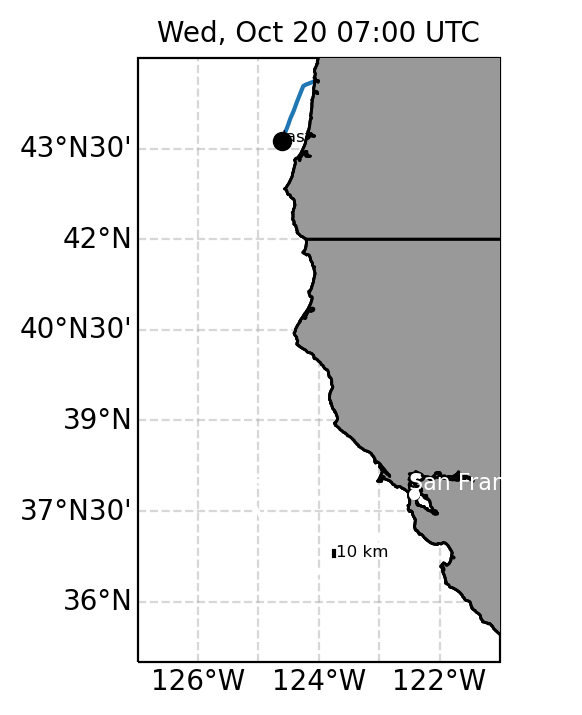

In [52]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
'''
daystr=ds.time.dt.day.astype(str).values[0]
monstr=ds.time.dt.month.astype(str).values[0]
yrstr=ds.time.dt.year.astype(str).values[0]
day_str = monstr+'-'+daystr+'-'+yrstr
'''
day_str=ds.time.isel(time=-1).dt.strftime("%a, %b %d %H:%M").values
ax.set_title(day_str+' UTC', size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
ax.add_feature(cartopy.feature.STATES, zorder=3, edgecolor='black')
ax.plot(ds.longitude_1hz_Avg,ds.latitude_1hz_Avg,transform=ccrs.PlateCarree())
ax.plot(ds.longitude_1hz_Avg.isel(time=-1),ds.latitude_1hz_Avg.isel(time=-1),'ko',transform=ccrs.PlateCarree())
ax.text(ds.longitude_1hz_Avg.isel(time=-1),ds.latitude_1hz_Avg.isel(time=-1), 'last_time', fontsize=6, transform=ccrs.PlateCarree())
# cs = ax.contourf(ds.lon,ds.lat,np.squeeze(ds.sea_surface_temperature)-273.15, levels, extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,fraction = 0.022,extend='both')
# cb.set_label('SST [$\circ$C]',fontsize = 10)
plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
x0 = -123.75
y0 = 36.75
ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')
ax.text(x0+2/60, y0-.5/60, '10 km', fontsize=6,transform=ccrs.PlateCarree())

if savefig:
    plt.savefig(__figdir__+'_foo_WG_pos_' + day_str + '.' +plotfiletype,**savefig_args)


In [30]:
ds.longitude_1hz_Avg

<xarray.DataArray 'longitude_1hz_Avg' (time: 205)>
array([-124.045, -124.045, -124.045, ..., -124.586, -124.599, -124.612],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-10-18T04:01:04 ... 2021-10-20T07:00:16
Attributes:
    units:    degrees

In [46]:
ds["time"].dt.strftime("%a, %b %d %H:%M")


<xarray.DataArray 'strftime' (time: 205)>
array(['Mon, Oct 18 04:01', 'Mon, Oct 18 04:16', 'Mon, Oct 18 04:30',
       'Mon, Oct 18 04:45', 'Mon, Oct 18 05:00', 'Mon, Oct 18 05:15',
       'Mon, Oct 18 05:30', 'Mon, Oct 18 05:45', 'Mon, Oct 18 06:00',
       'Mon, Oct 18 06:15', 'Mon, Oct 18 06:30', 'Mon, Oct 18 06:45',
       'Mon, Oct 18 07:00', 'Mon, Oct 18 07:15', 'Mon, Oct 18 07:30',
       'Mon, Oct 18 07:45', 'Mon, Oct 18 08:00', 'Mon, Oct 18 08:14',
       'Mon, Oct 18 08:32', 'Mon, Oct 18 08:46', 'Mon, Oct 18 09:01',
       'Mon, Oct 18 09:16', 'Mon, Oct 18 09:31', 'Mon, Oct 18 09:46',
       'Mon, Oct 18 10:01', 'Mon, Oct 18 10:16', 'Mon, Oct 18 10:31',
       'Mon, Oct 18 10:46', 'Mon, Oct 18 11:01', 'Mon, Oct 18 11:16',
       'Mon, Oct 18 11:31', 'Mon, Oct 18 11:46', 'Mon, Oct 18 12:01',
       'Mon, Oct 18 12:16', 'Mon, Oct 18 12:30', 'Mon, Oct 18 12:45',
       'Mon, Oct 18 13:00', 'Mon, Oct 18 13:15', 'Mon, Oct 18 13:30',
       'Mon, Oct 18 13:45', 'Mon, Oct 18 14:00', 'Mon, Oct 18 14:15',
       'Mon, Oct 18 14:30', 'Mon, Oct 18 14:45', 'Mon, Oct 18 15:00',
       'Mon, Oct 18 15:15', 'Mon, Oct 18 15:30', 'Mon, Oct 18 15:45',
       'Mon, Oct 18 16:00', 'Mon, Oct 18 16:17', 'Mon, Oct 18 16:32',
       'Mon, Oct 18 16:46', 'Mon, Oct 18 17:01', 'Mon, Oct 18 17:16',
       'Mon, Oct 18 17:31', 'Mon, Oct 18 17:46', 'Mon, Oct 18 18:01',
       'Mon, Oct 18 18:16', 'Mon, Oct 18 18:31', 'Mon, Oct 18 18:46',
...
       'Tue, Oct 19 16:46', 'Tue, Oct 19 17:01', 'Tue, Oct 19 17:16',
       'Tue, Oct 19 17:31', 'Tue, Oct 19 17:46', 'Tue, Oct 19 18:01',
       'Tue, Oct 19 18:16', 'Tue, Oct 19 18:31', 'Tue, Oct 19 18:46',
       'Tue, Oct 19 19:01', 'Tue, Oct 19 19:16', 'Tue, Oct 19 19:31',
       'Tue, Oct 19 19:46', 'Tue, Oct 19 20:01', 'Tue, Oct 19 20:16',
       'Tue, Oct 19 20:30', 'Tue, Oct 19 20:45', 'Tue, Oct 19 21:00',
       'Tue, Oct 19 21:15', 'Tue, Oct 19 21:30', 'Tue, Oct 19 21:45',
       'Tue, Oct 19 22:00', 'Tue, Oct 19 22:15', 'Tue, Oct 19 22:30',
       'Tue, Oct 19 22:45', 'Tue, Oct 19 23:00', 'Tue, Oct 19 23:15',
       'Tue, Oct 19 23:30', 'Tue, Oct 19 23:45', 'Wed, Oct 20 00:00',
       'Wed, Oct 20 00:17', 'Wed, Oct 20 00:32', 'Wed, Oct 20 00:46',
       'Wed, Oct 20 01:01', 'Wed, Oct 20 01:16', 'Wed, Oct 20 01:31',
       'Wed, Oct 20 01:46', 'Wed, Oct 20 02:01', 'Wed, Oct 20 02:16',
       'Wed, Oct 20 02:31', 'Wed, Oct 20 02:46', 'Wed, Oct 20 03:01',
       'Wed, Oct 20 03:16', 'Wed, Oct 20 03:31', 'Wed, Oct 20 03:46',
       'Wed, Oct 20 04:01', 'Wed, Oct 20 04:16', 'Wed, Oct 20 04:30',
       'Wed, Oct 20 04:45', 'Wed, Oct 20 05:00', 'Wed, Oct 20 05:15',
       'Wed, Oct 20 05:30', 'Wed, Oct 20 05:45', 'Wed, Oct 20 06:00',
       'Wed, Oct 20 06:15', 'Wed, Oct 20 06:30', 'Wed, Oct 20 06:45',
       'Wed, Oct 20 07:00'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2021-10-18T04:01:04 ... 2021-10-20T07:00:16

In [48]:
day_str=ds.time.isel(time=-1).dt.strftime("%a, %b %d %H:%M")


In [50]:
print(day_str.values)

Wed, Oct 20 07:00
